In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import optuna

In [2]:
data = pd.read_csv(r"D:\datasets\playground_rain\train.csv")

In [3]:
data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>],
       [<Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

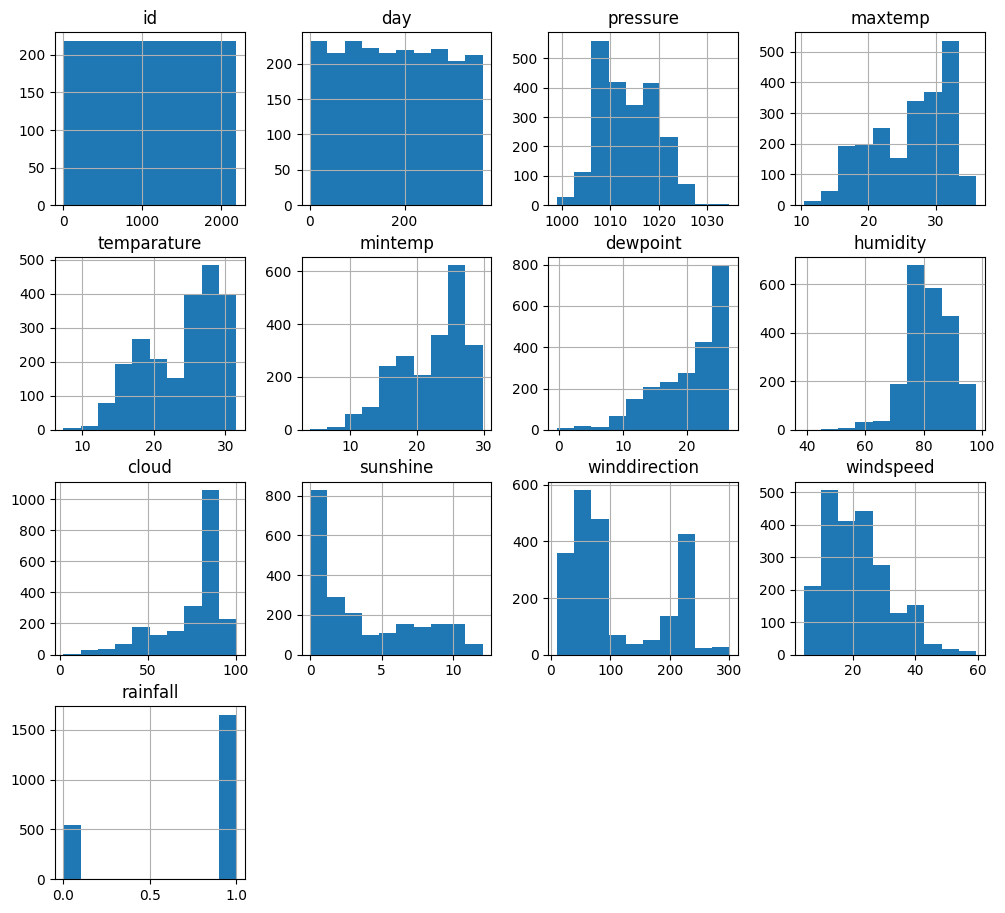

In [51]:
data.hist(figsize=(12, 11))

In [4]:
df = data.copy()

In [5]:
df

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [7]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


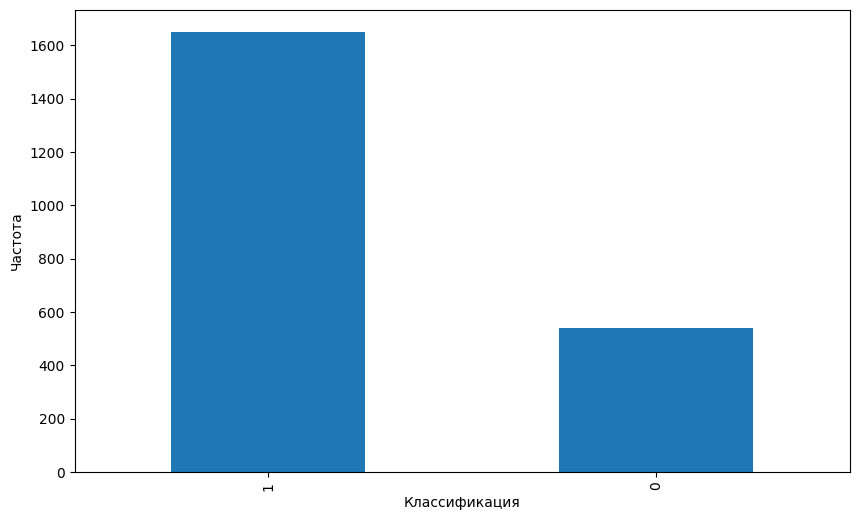

In [16]:
plt.figure(figsize=(10,6))
df["rainfall"].value_counts().plot(kind="bar")
plt.xlabel("Классификация")
plt.ylabel("Частота")
plt.show()

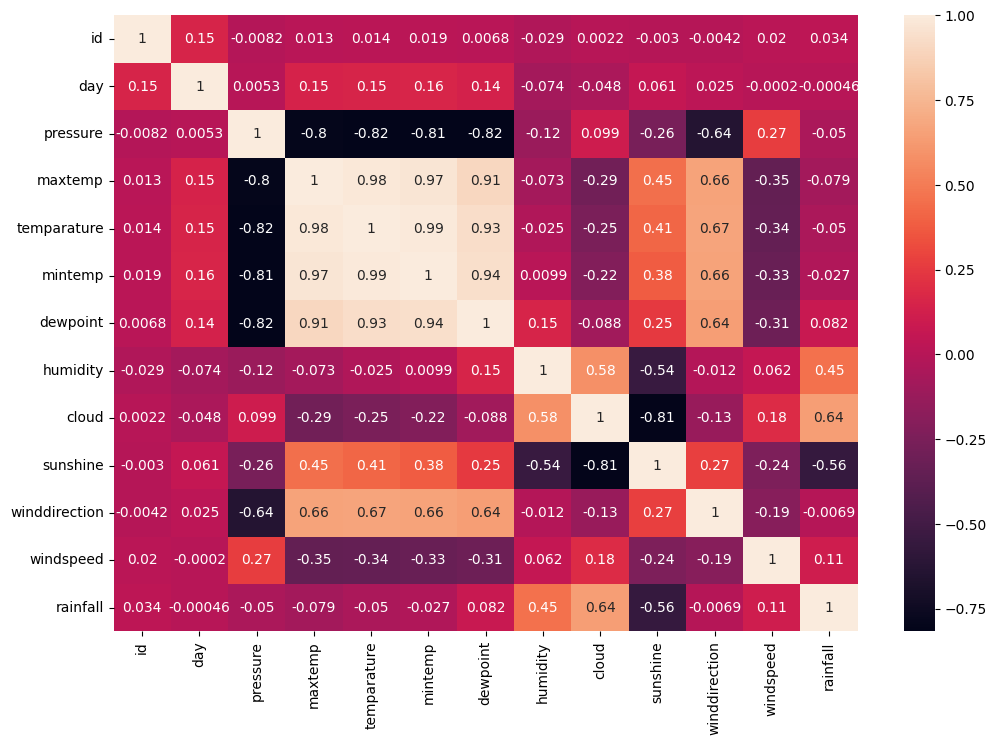

In [22]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [23]:
class FeatureEngeener(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["dew_humidity"] = X["dewpoint"] * X["humidity"]
        X["cloud_windspeed"] = X["cloud"] * X["windspeed"]
        X["cloud_to_humidity"] = X["cloud"] / X["humidity"]
        X["temp_to_sunshine"] = X["sunshine"] / X["temparature"] 
        X['wind_temp_interaction'] = X['windspeed'] * X['temparature']
        X['cloud_sun_ratio'] = X['cloud'] / (X['sunshine'] + 1)
        X["dew_humidity/sun"] = X["dewpoint"] * X["humidity"] / (X['sunshine'] + 1)
        X["dew_humidity_+"] = X["dewpoint"] * X["humidity"]
        X['humidity_sunshine_*'] = X["humidity"] * X['sunshine']
        X["cloud_humidity/pressure"] = (X["cloud"] * X["humidity"]) / X["pressure"]
        X['month'] = ((X['day'] - 1) // 30 + 1).clip(upper=12)
        X['season'] = X['month'].apply(lambda x: 1 if 3 <= x <= 5  
                                         else 2 if 6 <= x <= 8  
                                         else 3 if 9 <= x <= 11 
                                         else 0)  
        X['season_cloud_trend'] = X['cloud'] * X['season']
        X['season_cloud_deviation'] = X['cloud'] - X.groupby('season')['cloud'].transform('mean')
        X['season_temperature'] = X['temparature'] * X['season'] 
        X = X.drop('id', axis=1)
        X = X.drop(columns=["month"])
        X = X.drop(columns=["maxtemp", "winddirection","humidity","temparature","pressure","day","season"])
        return X

In [24]:
pipeline = Pipeline([('featureengineer', FeatureEngeener())])

In [25]:
transformed_data = pipeline.fit_transform(df)

In [26]:
transformed_data

,mintemp,dewpoint,cloud,sunshine,windspeed,rainfall,dew_humidity,cloud_windspeed,cloud_to_humidity,temp_to_sunshine,wind_temp_interaction,cloud_sun_ratio,dew_humidity/sun,dew_humidity_+,humidity_sunshine_*,cloud_humidity/pressure,season_cloud_trend,season_cloud_deviation,season_temperature
0,19.9,19.4,88.0,1.1,17.2,1,1687.8,1513.6,1.011494,0.053398,354.32,41.904762,803.714286,1687.8,95.7,7.525064,0.0,7.875657,0.0
1,15.8,15.4,91.0,0.0,21.9,1,1463.0,1992.9,0.957895,0.000000,370.11,91.000000,1463.000000,1463.0,0.0,8.479647,0.0,10.875657,0.0
2,14.6,9.3,47.0,8.3,18.1,1,697.5,850.7,0.626667,0.515528,291.41,5.053763,75.000000,697.5,622.5,3.442047,0.0,-33.124343,0.0
3,16.9,16.8,95.0,0.0,35.6,1,1596.0,3382.0,1.000000,0.000000,633.68,95.000000,1596.000000,1596.0,0.0,8.905664,0.0,14.875657,0.0
4,15.2,9.6,45.0,3.6,24.8,0,499.2,1116.0,0.865385,0.195652,456.32,9.782609,108.521739,499.2,187.2,2.290076,0.0,-35.124343,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,19.1,19.9,88.0,0.1,22.1,1,1930.3,1944.8,0.907216,0.004854,455.26,80.000000,1754.818182,1930.3,9.7,8.413168,0.0,7.875657,0.0
2186,16.3,15.3,88.0,0.0,35.3,1,1392.3,3106.4,0.967033,0.000000,610.69,88.000000,1392.300000,1392.3,0.0,7.909917,0.0,7.875657,0.0
2187,14.3,12.6,79.0,5.0,32.9,1,995.4,2599.1,1.000000,0.306748,536.27,13.166667,165.900000,995.4,395.0,6.159084,0.0,-1.124343,0.0
2188,13.8,14.7,93.0,0.1,18.0,1,1352.4,1674.0,1.010870,0.006579,273.60,84.545455,1229.454545,1352.4,9.2,8.369363,0.0,12.875657,0.0


In [27]:
X = transformed_data.drop('rainfall', axis=1)
y = transformed_data['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0)
    }

    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return roc_auc_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250, n_jobs=-1)

print("Лучшие параметры:", study.best_params)

[I 2025-04-20 11:18:18,491] A new study created in memory with name: no-name-5d18f762-d115-4585-ad83-143acf0ba154
[I 2025-04-20 11:18:20,018] Trial 18 finished with value: 0.7674718790337451 and parameters: {'learning_rate': 0.1675644016660024, 'n_estimators': 67, 'max_depth': 4, 'subsample': 0.8619324536626622, 'colsample_bytree': 0.6976562834708906}. Best is trial 18 with value: 0.7674718790337451.
[I 2025-04-20 11:18:22,688] Trial 16 finished with value: 0.7449619346171069 and parameters: {'learning_rate': 0.25282212268007426, 'n_estimators': 125, 'max_depth': 9, 'subsample': 0.7993237333869041, 'colsample_bytree': 0.3804613744271085}. Best is trial 18 with value: 0.7674718790337451.
[I 2025-04-20 11:18:23,487] Trial 12 finished with value: 0.7596348884381339 and parameters: {'learning_rate': 0.11438640284529333, 'n_estimators': 165, 'max_depth': 8, 'subsample': 0.7612457246646556, 'colsample_bytree': 0.4645249760668736}. Best is trial 18 with value: 0.7674718790337451.
[I 2025-04-2

Лучшие параметры: {'learning_rate': 0.011291207558183998, 'n_estimators': 1105, 'max_depth': 3, 'subsample': 0.35448329699296827, 'colsample_bytree': 0.859019776580368}


In [30]:
model = XGBClassifier(**study.best_params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.859019776580368, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.011291207558183998,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1105, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
model.feature_importances_

array([0.03793482, 0.0396486 , 0.11727059, 0.03959672, 0.03628023,
       0.04176906, 0.03961122, 0.0360892 , 0.04819841, 0.03848972,
       0.04643612, 0.08564004, 0.03730987, 0.04052325, 0.10817053,
       0.04295595, 0.12662157, 0.03745408], dtype=float32)

In [32]:
y_pred = model.predict(X_test)

In [33]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_curve_score = roc_auc_score(y_test, y_pred)

In [34]:
recall

0.9467084639498433

In [35]:
precision

0.877906976744186

In [36]:
roc_curve_score

np.float64(0.7968836437396274)

In [37]:
test_data = pd.read_csv(r"D:\datasets\playground_rain\test.csv")

In [38]:
test_transform_data = pipeline.fit_transform(test_data)

In [39]:
predicts = model.predict(test_transform_data)

In [84]:
rain_submission = pd.DataFrame()
rain_submission['id'] = test_data['id']
rain_submission['rainfall'] = predicts

In [85]:
rain_submission.to_csv('rain_submission.csv', index=False)